In [141]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [52]:
query = ["created:>2021-01-01", "created:2020-01-01..2020-12-31", "created:2019-01-01..2019-12-31"]
# this data is obtained by code in trending technologies

In [170]:
df = pd.DataFrame()

In [171]:
df = pd.read_csv('Github_repo_data_2019.csv')
df.shape

(1000, 97)

In [172]:
df2 = pd.read_csv('Github_repo_data_2020.csv')
df2.shape

(1000, 97)

In [173]:
df3 = pd.read_csv('Github_repo_data_2021.csv')
df3.shape

(1000, 97)

In [174]:
df = pd.concat([df, df2, df3])

In [175]:
df.shape

(3000, 97)

In [51]:
df.head()

,Unnamed: 0,id,node_id,name,full_name,private,html_url,description,fork,url,...,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
0,0,177736533,MDEwOlJlcG9zaXRvcnkxNzc3MzY1MzM=,996.ICU,996icu/996.ICU,False,https://github.com/996icu/996.ICU,Repo for counting stars and contributing. Pres...,False,https://api.github.com/repos/996icu/996.ICU,...,https://api.github.com/users/996icu/events{/pr...,https://api.github.com/users/996icu/received_e...,User,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,NaN
1,1,189621607,MDEwOlJlcG9zaXRvcnkxODk2MjE2MDc=,docs,github/docs,False,https://github.com/github/docs,The open-source repo for docs.github.com,False,https://api.github.com/repos/github/docs,...,https://api.github.com/users/github/events{/pr...,https://api.github.com/users/github/received_e...,Organization,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,NaN
2,2,228683419,MDEwOlJlcG9zaXRvcnkyMjg2ODM0MTk=,it-cert-automation-practice,google/it-cert-automation-practice,False,https://github.com/google/it-cert-automation-p...,Google IT Automation with Python Professional ...,False,https://api.github.com/repos/google/it-cert-au...,...,https://api.github.com/users/google/events{/pr...,https://api.github.com/users/google/received_e...,Organization,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NaN
3,3,212094940,MDEwOlJlcG9zaXRvcnkyMTIwOTQ5NDA=,DO180-apps,RedHatTraining/DO180-apps,False,https://github.com/RedHatTraining/DO180-apps,DO180 Repository for Sample Applications,False,https://api.github.com/repos/RedHatTraining/DO...,...,https://api.github.com/users/RedHatTraining/ev...,https://api.github.com/users/RedHatTraining/re...,Organization,False,NaN,NaN,NaN,NaN,NaN,NaN
4,4,177216275,MDEwOlJlcG9zaXRvcnkxNzcyMTYyNzU=,mslearn-tailspin-spacegame-web,MicrosoftDocs/mslearn-tailspin-spacegame-web,False,https://github.com/MicrosoftDocs/mslearn-tails...,Code used in Microsoft Learn modules to suppor...,False,https://api.github.com/repos/MicrosoftDocs/msl...,...,https://api.github.com/users/MicrosoftDocs/eve...,https://api.github.com/users/MicrosoftDocs/rec...,Organization,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 97 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3000 non-null   int64  
 1   id                         3000 non-null   int64  
 2   node_id                    3000 non-null   object 
 3   name                       3000 non-null   object 
 4   full_name                  3000 non-null   object 
 5   private                    3000 non-null   bool   
 6   html_url                   3000 non-null   object 
 7   description                2125 non-null   object 
 8   fork                       3000 non-null   bool   
 9   url                        3000 non-null   object 
 10  forks_url                  3000 non-null   object 
 11  keys_url                   3000 non-null   object 
 12  collaborators_url          3000 non-null   object 
 13  teams_url                  3000 non-null   object

In [176]:
# 'created_at' contains the information regarding when was the repo made but in str form
# We will use pd.to_datetime to convert it into a Date Time Object

df['created_at'] = pd.to_datetime(df['created_at'])
df = df.set_index('created_at')

In [71]:
df.head()

,Unnamed: 0,id,node_id,name,full_name,private,html_url,description,fork,url,...,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,license
created_at,,,,,,,,,,,,,,,,,,,,,
2019-03-26 07:31:14+00:00,0,177736533,MDEwOlJlcG9zaXRvcnkxNzc3MzY1MzM=,996.ICU,996icu/996.ICU,False,https://github.com/996icu/996.ICU,Repo for counting stars and contributing. Pres...,False,https://api.github.com/repos/996icu/996.ICU,...,https://api.github.com/users/996icu/events{/pr...,https://api.github.com/users/996icu/received_e...,User,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,NaN
2019-05-31 15:57:39+00:00,1,189621607,MDEwOlJlcG9zaXRvcnkxODk2MjE2MDc=,docs,github/docs,False,https://github.com/github/docs,The open-source repo for docs.github.com,False,https://api.github.com/repos/github/docs,...,https://api.github.com/users/github/events{/pr...,https://api.github.com/users/github/received_e...,Organization,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,NaN
2019-12-17 19:04:12+00:00,2,228683419,MDEwOlJlcG9zaXRvcnkyMjg2ODM0MTk=,it-cert-automation-practice,google/it-cert-automation-practice,False,https://github.com/google/it-cert-automation-p...,Google IT Automation with Python Professional ...,False,https://api.github.com/repos/google/it-cert-au...,...,https://api.github.com/users/google/events{/pr...,https://api.github.com/users/google/received_e...,Organization,False,apache-2.0,Apache License 2.0,Apache-2.0,https://api.github.com/licenses/apache-2.0,MDc6TGljZW5zZTI=,NaN
2019-10-01 12:50:51+00:00,3,212094940,MDEwOlJlcG9zaXRvcnkyMTIwOTQ5NDA=,DO180-apps,RedHatTraining/DO180-apps,False,https://github.com/RedHatTraining/DO180-apps,DO180 Repository for Sample Applications,False,https://api.github.com/repos/RedHatTraining/DO...,...,https://api.github.com/users/RedHatTraining/ev...,https://api.github.com/users/RedHatTraining/re...,Organization,False,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22 22:20:37+00:00,4,177216275,MDEwOlJlcG9zaXRvcnkxNzcyMTYyNzU=,mslearn-tailspin-spacegame-web,MicrosoftDocs/mslearn-tailspin-spacegame-web,False,https://github.com/MicrosoftDocs/mslearn-tails...,Code used in Microsoft Learn modules to suppor...,False,https://api.github.com/repos/MicrosoftDocs/msl...,...,https://api.github.com/users/MicrosoftDocs/eve...,https://api.github.com/users/MicrosoftDocs/rec...,Organization,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,NaN


In [149]:
dx = pd.DataFrame(df.groupby(['language', df.index.year]).id.count())
dx.head()

id
language   created_at    
AGS Script 2020         2
Assembly   2020         1
           2021         3
Batchfile  2020         2
           2021        19

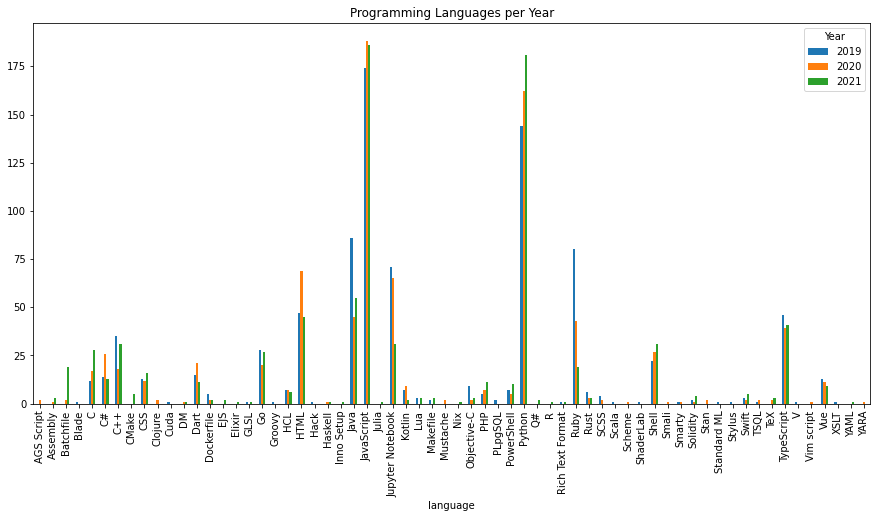

In [196]:
fig, ax = plt.subplots()
dx.unstack().plot(kind = 'bar', title = 'Programming Languages per Year', ax = ax)
ax.legend(['2019', '2020', '2021'], title = 'Year')
fig.set_figwidth(15)
fig.set_figheight(7)
plt.show()